# hrc-s exposure map

In [1]:
#source /export/ciao/bin/ciao.bash -o
PFILES="./param;$ASCDS_INSTALL/param:$ASCDS_INSTALL/contrib/param"
mkdir -p ./param
ASCDS_WORK_PATH=./


## download

In [2]:
/bin/rm -rf 1038
download_chandra_obsid 1038 --exclude vvref,osol,eph1,evt2


  Type     Format      Size  0........H.........1  Download Time Average Rate
  ---------------------------------------------------------------------------
  evt1     fits      355 Mb  ####################            5 s  75450.8 kb/s
  asol     fits       11 Mb  ####################            1 s  9260.2 kb/s
  mtl      fits        7 Mb  ####################          < 1 s  47090.4 kb/s
  cntr_img jpg       923 Kb  ####################          < 1 s  26246.9 kb/s
  aqual    fits      755 Kb  ####################          < 1 s  23671.8 kb/s
  cntr_img fits      422 Kb  ####################          < 1 s  17472.5 kb/s
  dtf      fits      184 Kb  ####################          < 1 s  11140.8 kb/s
  full_img fits       70 Kb  ####################          < 1 s  5519.4 kb/s
  vv       pdf        35 Kb  ####################          < 1 s  2446.7 kb/s
  full_img jpg        21 Kb  ####################          < 1 s  815.5 kb/s
  oif      fits       20 Kb  ####################         

In [3]:
/bin/rm -rf repro
chandra_repro 1038 `pwd`/repro 


Running chandra_repro
version: 14 September 2021


Processing input directory '/proj/sds/Staff/kjg/Threads/expmap_hrcs/1038'

No boresight correction update to asol file is needed.

Running hrc_build_badpix to create new bad pixel file...

Running hrc_process_events to reprocess the evt1.fits file...
Output from hrc_process_events:
# hrc_process_events (CIAO 4.14): The following error occurred 14 times:
	dsHPEEVENTSEQERR -- WARNING: Out of sequence events discovered in /proj/sds/Staff/kjg/Threads/expmap_hrcs/1038/secondary/hrcf01038_000N005_evt1.fits.
# hrc_process_events (CIAO 4.14): The following error occurred 2 times:
Filtering the evt1.fits file on grade and status...
Applying the good time intervals from the flt1.fits file...

Running hrc_dtfstats to recompute the average dead time corrections...
The new level=2 event file is: /proj/sds/Staff/kjg/Threads/expmap_hrcs/repro/hrcf01038_repro_evt2.fits

Updating the event file header with chandra_repro HISTORY record
Creating FOV fil

## Run `fluximage`

In [4]:
fluximage repro/ casa bands=::1.1 binsize=16 clob+

Running fluximage
Version: 23 February 2021

Found repro/hrcf01038_repro_evt2.fits
Using event file repro/hrcf01038_repro_evt2.fits
Using PI=: with a monochromatic energy of 1.1 keV.
Aspect solution repro/pcadf01038_000N001_asol1.fits found.
Bad-pixel file repro/hrcf01038_repro_bpix1.fits found.
Mask file repro/hrcf01038_000N005_msk1.fits found.
Dtf file repro/hrcf01038_000N005_dtf1.fits found.

The output images will have 980 by 315 pixels, pixel size of 2.1088 arcsec,
    and cover x=24096.5:39776.5:16,y=30192.5:35232.5:16.

Running tasks in parallel with 4 processors.
Creating aspect histogram for obsid 1038
# asphist (CIAO 4.14): WARNING: skipping 35 livetime correction records (from time: 117263850.466868 to time: 117263920.166871)


Creating instrument map for obsid 1038
Creating exposure map for obsid 1038
Thresholding data for obsid 1038
Exposure-correcting image for obsid 1038

The following files were created:

 The clipped counts image is:
     casa_all_thresh.img

 The clip

---
## Step-by-step

### Create image

In [5]:
dmcopy "repro/hrcf01038_repro_evt2.fits[sky=region(repro/hrcf01038_repro_fov1.fits)][bin sky=::16]" img.bin16 clob+

### asphist

In [6]:
cat repro/hrcf01038_asol1.lis

/proj/sds/Staff/kjg/Threads/expmap_hrcs/1038/primary/pcadf01038_000N001_asol1.fits


In [7]:
asphist @-repro/hrcf01038_asol1.lis asphist.fits \
   repro/hrcf01038_repro_evt2.fits repro/hrcf01038_000N005_dtf1.fits clob+

# asphist (CIAO 4.14): WARNING: skipping 35 livetime correction records (from time: 117263850.466868 to time: 117263920.166871)




### instmap

In [8]:
pset mkinstmap pixelgrid="1:16384:#1024,1:16384:#1024"
pset mkinstmap obsfile="repro/hrcf01038_repro_evt2.fits"
pset mkinstmap maskfile="repro/hrcf01038_000N005_msk1.fits"
pset mkinstmap detsubsys=HRC-S2
pset mkinstmap outfile=2.instmap 
pset mkinstmap spectrum=NONE monoenergy=1.1 
mkinstmap mode=h clob+

### Expmap

In [9]:
get_sky_limits img.bin16

Running: get_sky_limits
  version: 07 October 2016
Checking binning of image: img.bin16
  Image has 980 x 314 pixels
  Pixel size is 15.999999999999996 by 15.999999999999988
  Lower left (0.5,0.5) corner is x,y= 24105.7, 30197.1
  Upper right (980.5,314.5) corner is x,y= 39785.7, 35221.1
  DM filter is:
    x=24105.7:39785.7:#980,y=30197.1:35221.1:#314
  mkexpmap xygrid value is:
    24105.7:39785.7:#980,30197.1:35221.1:#314


In [10]:
pset mkexpmap xygrid=")get_sky_limits.xygrid"
pset mkexpmap normalize=no
pset mkexpmap asp=asphist.fits 
pset mkexpmap outfile=expmap.bin16 
pset mkexpmap inst=2.instmap 
mkexpmap mode=h clob+

[1] 38220
[1]+  Done                    ds9 expmap.bin16 -cmap b -saveimage png ds9_01.png


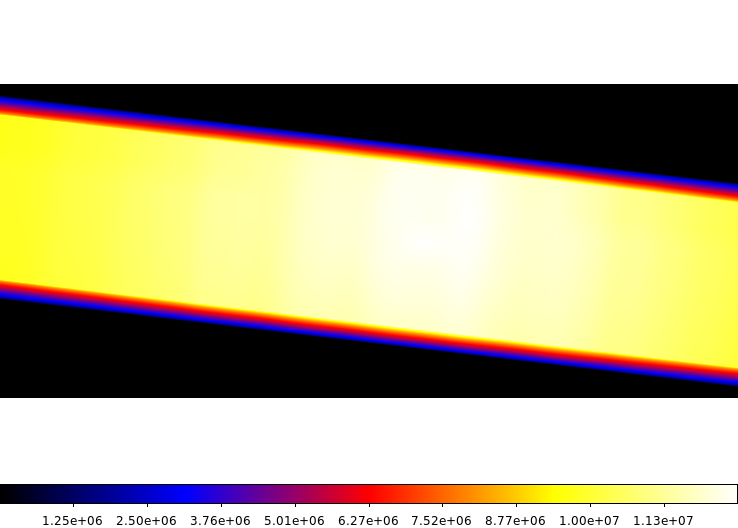

In [11]:
ds9 expmap.bin16 -cmap b -saveimage png ds9_01.png &
sleep 10
xpaset -p ds9 quit

display < ds9_01.png

### Threshold

In [12]:
dmimgthresh img.bin16 img.thresh.bin16 expfile=expmap.bin16 cut=1.5% clob+
dmimgthresh expmap.bin16 expmap.thresh.bin16 cut=1.5% clob+

### Normalize aka Divide

In [13]:
dmimgcalc img.thresh.bin16 expmap.thresh.bin16 norm.bin16 div clob+

[1] 38263
[1]+  Done                    ds9 norm.bin16 -cmap b -scale log -saveimage png ds9_02.png


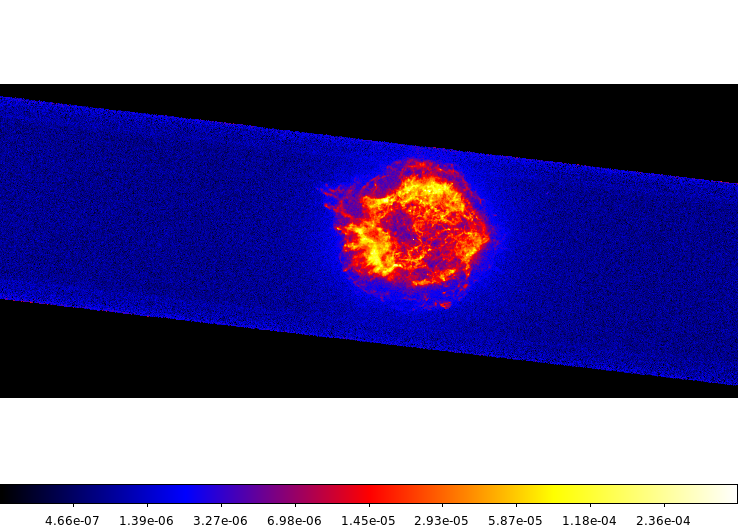

In [14]:
ds9 norm.bin16 -cmap b -scale log -saveimage png ds9_02.png &
sleep 10
xpaset -p ds9 quit

display < ds9_02.png

# Cleanup

In [15]:
/bin/rm -rf 1038 repro 